In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io
from scipy.stats import boxcox

In [2]:
df = pd.read_csv('./US_Accidents_March23.csv/US_Accidents_March23.csv')
print("The shape of data is:",(df.shape))
display(df.head(3))

The shape of data is: (7728394, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day


<AxesSubplot:title={'center':'Severity Count by Sources'}, xlabel='Source'>

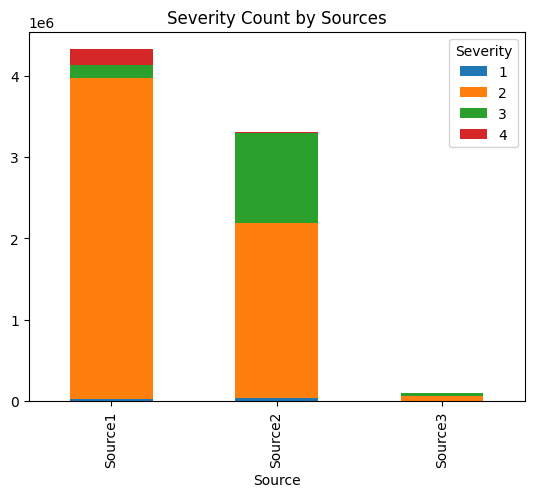

In [3]:
df_source = df.groupby(['Severity','Source']).size().reset_index().pivot(\
    columns='Severity', index='Source', values=0)
df_source.plot(kind='bar', stacked=True, title='Severity Count by Sources')

In [4]:
# fix datetime type
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

# calculate duration as the difference between end time and start time in minute
df['Duration'] = df.End_Time - df.Start_Time 
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
print("The overall mean duration is: ", (round(df['Duration'].mean(),3)), 'min')

The overall mean duration is:  444.466 min


C:\Users\21069\AppData\Local\Temp\ipykernel_16484\4152880561.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Severity", y="Duration",
C:\Users\21069\AppData\Local\Temp\ipykernel_16484\4152880561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Severity", y="Duration",


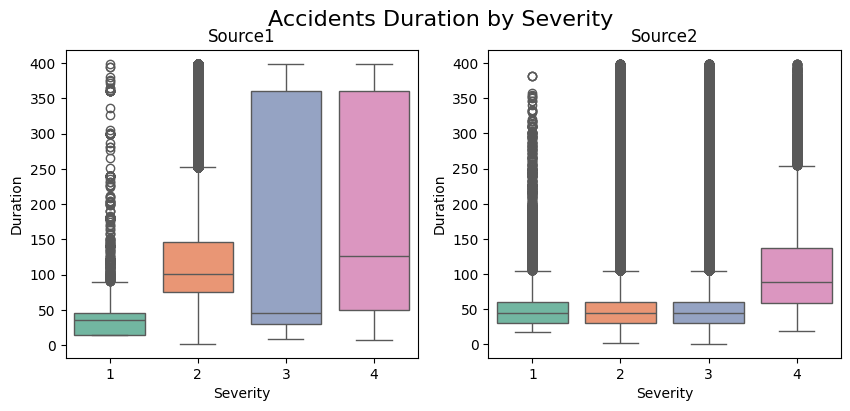

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="Source1") & (df['Duration']<400),], palette="Set2", ax=axs[0])
axs[0].set_title('Source1')
fig.suptitle('Accidents Duration by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="Source2") & (df['Duration']<400),], palette="Set2", ax=axs[1])
axs[1].set_title('Source2')
plt.show()

C:\Users\21069\AppData\Local\Temp\ipykernel_16484\1261667184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Severity", y="Distance(mi)",
C:\Users\21069\AppData\Local\Temp\ipykernel_16484\1261667184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Severity", y="Distance(mi)",


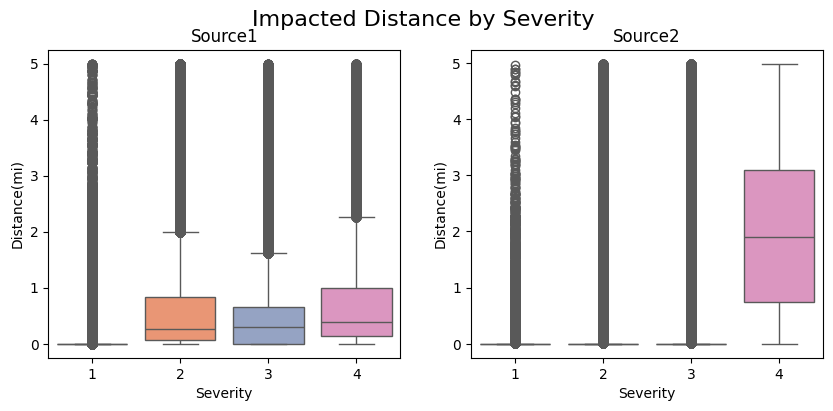

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Distance(mi)", 
            data=df.loc[(df['Source']=="Source1") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[0])
axs[0].set_title('Source1')
fig.suptitle('Impacted Distance by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Distance(mi)",
            data=df.loc[(df['Source']=="Source2") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[1])
axs[1].set_title('Source2')
plt.show()

In [7]:
df = df.loc[df['Source']=="Source2",]
df = df.drop(['Source'], axis=1)
print("The shape of data is:",(df.shape))

The shape of data is: (3305373, 46)


In [8]:
df = df.drop(['ID','Description','Distance(mi)', 'End_Time', 'Duration', 
              'End_Lat', 'End_Lng'], axis=1)

In [9]:
cat_names = ['Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].unique().size)

Unique count of categorical features:
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


In [10]:
df = df.drop(['Country','Turning_Loop'], axis=1)

In [11]:
print("Wind Direction: ", df['Wind_Direction'].unique())

Wind Direction:  ['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


In [12]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['CALM' 'SW' 'S' 'W' 'NW' 'N' 'VAR' 'SE' 'E' 'NE' nan]


In [13]:
# show distinctive weather conditions 
weather ='!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drizzle', 'Dust', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Duststorm', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Smoke', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Hail', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Grains', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorm', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Showers', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 

In [14]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog|Haze', case=False, na = False), True, False)

In [15]:
# Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
#     df[i] = df[i].astype('bool')

display(df.loc[:,['Weather_Condition'] + weather])

display(df.loc[df['Weather_Condition'].isnull(), ['Weather_Condition'] + weather])

df = df.drop(['Weather_Condition'], axis=1)

,Weather_Condition,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
0,Light Rain,False,False,True,False,False,False,False
1,Light Rain,False,False,True,False,False,False,False
2,Overcast,False,True,False,False,False,False,False
3,Mostly Cloudy,False,True,False,False,False,False,False
4,Mostly Cloudy,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3402757,Fair,False,False,False,False,False,False,False
3402758,Clear,True,False,False,False,False,False,False
3402759,Haze,False,False,False,False,False,False,True
3402760,Clear,True,False,False,False,False,False,False


,Weather_Condition,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3402570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3402581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3402642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3402691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.loc[:,weather]

,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
0,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
3402757,False,False,False,False,False,False,False
3402758,True,False,False,False,False,False,False
3402759,False,False,False,False,False,False,True
3402760,True,False,False,False,False,False,False


In [17]:
# average difference between weather time and start time
print("Mean difference between 'Start_Time' and 'Weather_Timestamp': ", 
(df.Weather_Timestamp - df.Start_Time).mean())

Mean difference between 'Start_Time' and 'Weather_Timestamp':  0 days 00:00:33.576478407


In [18]:
df = df.drop(["Weather_Timestamp"], axis=1)

df['Year'] = df['Start_Time'].dt.year

nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth

df['Weekday']= df['Start_Time'].dt.weekday

days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday

df['Hour'] = df['Start_Time'].dt.hour

df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

df.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2016-02-08 05:46:00,2016,2,0,39,5,346.0
1,2016-02-08 06:07:59,2016,2,0,39,6,367.0
2,2016-02-08 06:49:27,2016,2,0,39,6,409.0
3,2016-02-08 07:23:34,2016,2,0,39,7,443.0
4,2016-02-08 07:39:07,2016,2,0,39,7,459.0


In [19]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
4,Street,0.049162
5,City,0.001845
8,Zipcode,0.013191
9,Timezone,0.084680
10,Airport_Code,0.196226
11,Temperature(F),1.683471
12,Wind_Chill(F),43.565643
13,Humidity(%),1.798980
14,Pressure(in),1.442046
15,Visibility(mi),1.924957


In [20]:
df = df.drop(['Wind_Chill(F)'], axis=1)

In [21]:
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.02,0
1,0.00,0
2,0.00,1
3,0.00,1
4,0.00,1
5,0.03,0


In [22]:
df = df.dropna(subset=['Street','City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

In [23]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with median value
Weather_data=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']
print("The number of remaining missing values: ")
for i in Weather_data:
  df[i] = df.groupby(['Airport_Code','Month'])[i].transform(lambda x: x.fillna(x.median()))
  print( i + " : " + df[i].isnull().sum().astype(str))

The number of remaining missing values: 


D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

Temperature(F) : 6246


D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

Humidity(%) : 6269


D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

Pressure(in) : 6223


D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

Visibility(mi) : 14275


D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
D:\ProgramData\anaconda3\envs\d2l-zh\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

Wind_Speed(mph) : 14215


In [24]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
11,Temperature(F),0.189512
12,Humidity(%),0.190210
13,Pressure(in),0.188814
14,Visibility(mi),0.433123
15,Wind_Direction,1.396308
16,Wind_Speed(mph),0.431302
34,Clear,1.715347
35,Cloud,1.715347
36,Rain,1.715347
37,Heavy_Rain,1.715347


In [25]:
df = df.dropna(subset=Weather_data)

In [26]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
15,Wind_Direction,1.103203
34,Clear,1.288710
35,Cloud,1.288710
36,Rain,1.288710
37,Heavy_Rain,1.288710
38,Snow,1.288710
39,Heavy_Snow,1.288710
40,Fog,1.288710


In [27]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with majority value
from collections import Counter
weather_cat = ['Wind_Direction'] + weather
print("Count of missing values that will be dropped: ")
for i in weather_cat:
  df[i] = df.groupby(['Airport_Code','Month'])[i].transform(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)
  print(i + " : " + df[i].isnull().sum().astype(str))

# drop na
df = df.dropna(subset=weather_cat)

Count of missing values that will be dropped: 
Wind_Direction : 10402
Clear : 9173
Cloud : 9956
Rain : 7866
Heavy_Rain : 6819
Snow : 6959
Heavy_Snow : 6800
Fog : 6954


In [28]:
severity_counts = df['Severity'].value_counts()
print(severity_counts)

2    2129529
3    1089557
1      34533
4      13915
Name: Severity, dtype: int64


In [29]:
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df = df.drop(['Severity'], axis = 1)
df.Severity4.value_counts()

0    3253619
1      13915
Name: Severity4, dtype: int64

In [30]:
def resample(dat, col, n):
    return pd.concat([dat[dat[col]==1].sample(n, replace = True),
                   dat[dat[col]==0].sample(n)], axis=0)

resampled data: 0    50000
1    50000
Name: Severity4, dtype: int64


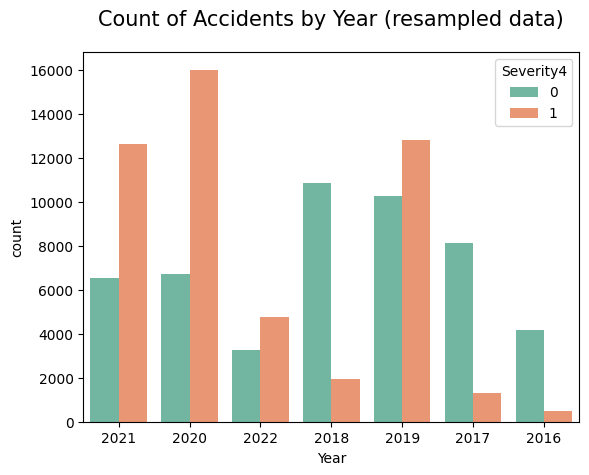

In [31]:
df_bl = resample(df, 'Severity4', 50000)
print('resampled data:', df_bl.Severity4.value_counts())
df_bl.Year = df_bl.Year.astype(str)
sns.countplot(x='Year', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.show()

2016 365
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 90


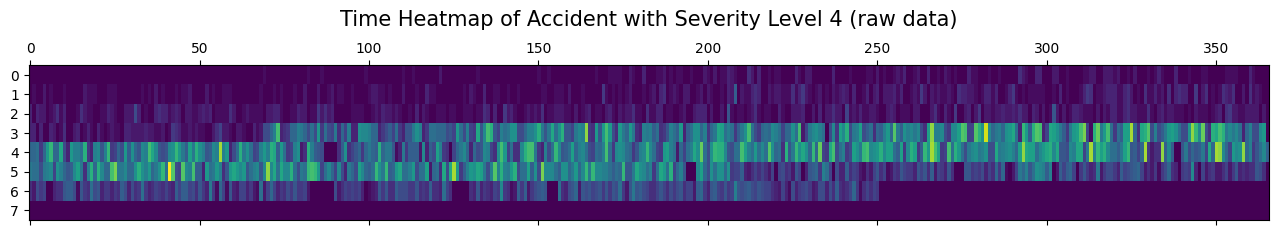

In [32]:
# create a dataframe used to plot heatmap
df_date = df.loc[:,['Start_Time','Severity4']]         # create a new dateframe only containing time and severity
df_date['date'] = df_date['Start_Time'].dt.normalize() # keep only the date part of start time
df_date = df_date.drop(['Start_Time'], axis = 1)
df_date = df_date.groupby('date').sum()                # sum the number of accidents with severity level 4 by date
df_date = df_date.reset_index().drop_duplicates()

# join the dataframe with full range of date from 2016 to 2020
full_date = pd.DataFrame(pd.date_range(start="2016-01-02",end="2023-3-31"))    
df_date = full_date.merge(df_date, how = 'left',left_on = 0, right_on = 'date')
df_date['date'] = df_date.iloc[:,0]
df_date = df_date.fillna(0)
df_date = df_date.iloc[:,1:].set_index('date')

# group by date
groups = df_date['Severity4'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    if name.year == 2023:
        years[name.year] = np.append(group.values,[0]*(366-90))
    elif name.year != 2020:
        years[name.year] = np.append(group.values,0)
    else:
        years[name.year] = group.values
#     print(name.year, group.values,len(group.values))
    print(name.year, len(group.values))

# plot
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.title('Time Heatmap of Accident with Severity Level 4 (raw data)', y=1.2, fontsize=15)
plt.show()

In [33]:
df = df.loc[(df['Start_Time'] > "2019-03-10")&(df['Start_Time'] < "2021-06-10"),:]
df = df.drop(['Year', 'Start_Time'], axis=1)
df['Severity4'].value_counts()

0    1156758
1       9969
Name: Severity4, dtype: int64

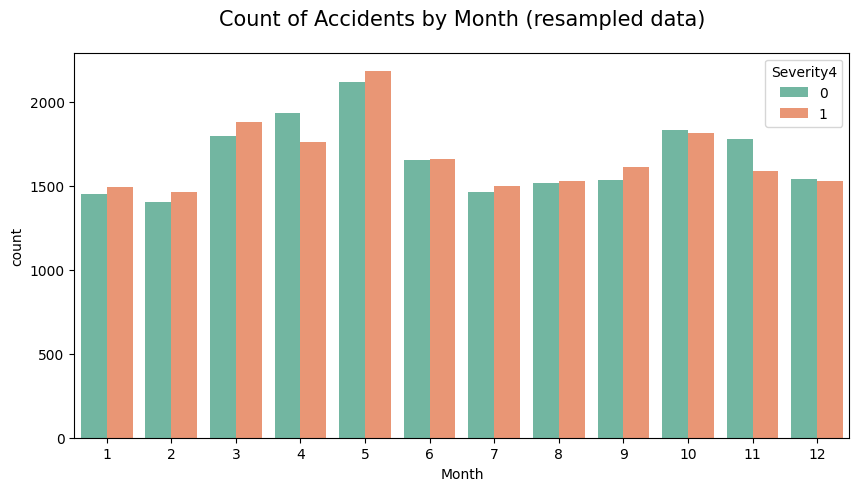

In [34]:
df_bl = resample(df, 'Severity4', 20000)
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Month (resampled data)', size=15, y=1.05)
plt.show()

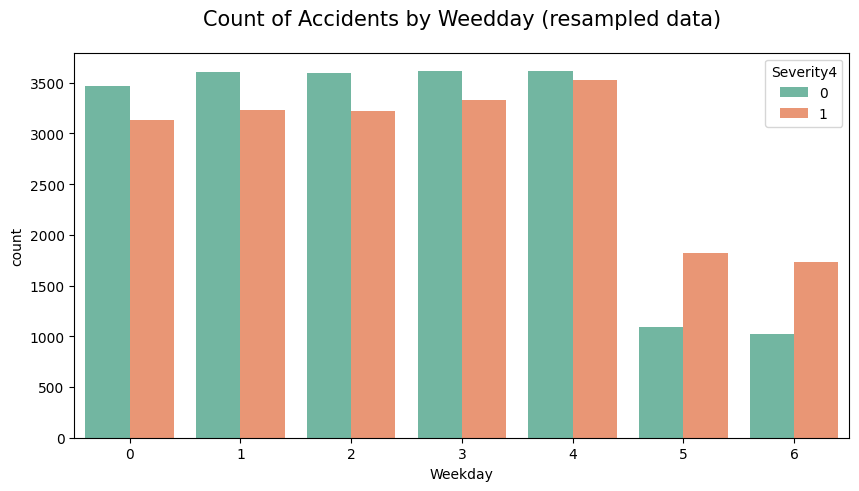

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Weedday (resampled data)', size=15, y=1.05)
plt.show()

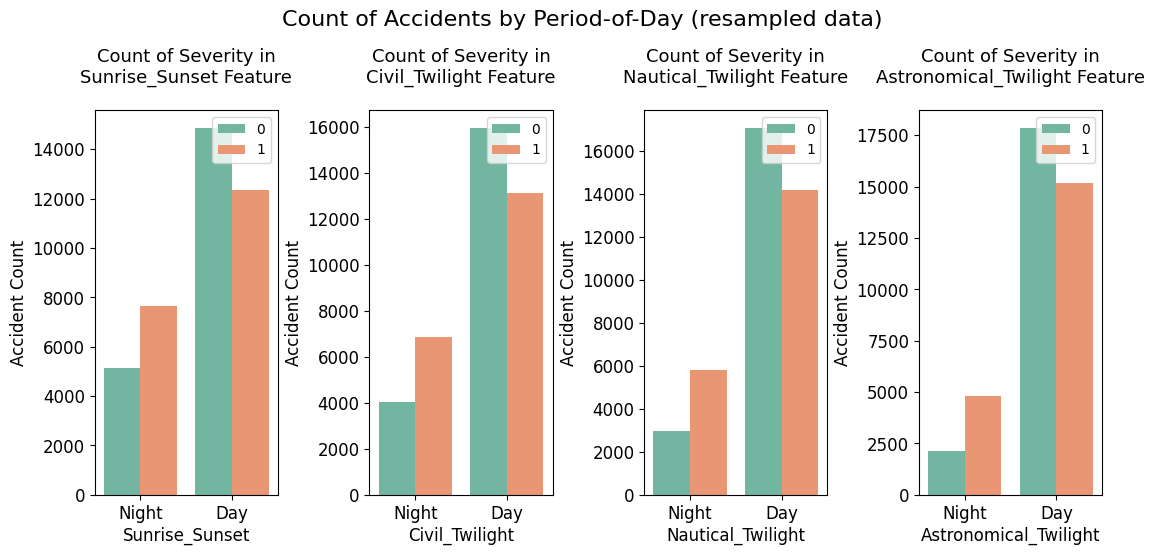

In [36]:
period_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(13, 5))

plt.subplots_adjust(wspace = 0.5)
for i, feature in enumerate(period_features, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in\n{} Feature'.format(feature), size=13, y=1.05)
fig.suptitle('Count of Accidents by Period-of-Day (resampled data)',y=1.08, fontsize=16)
plt.show()

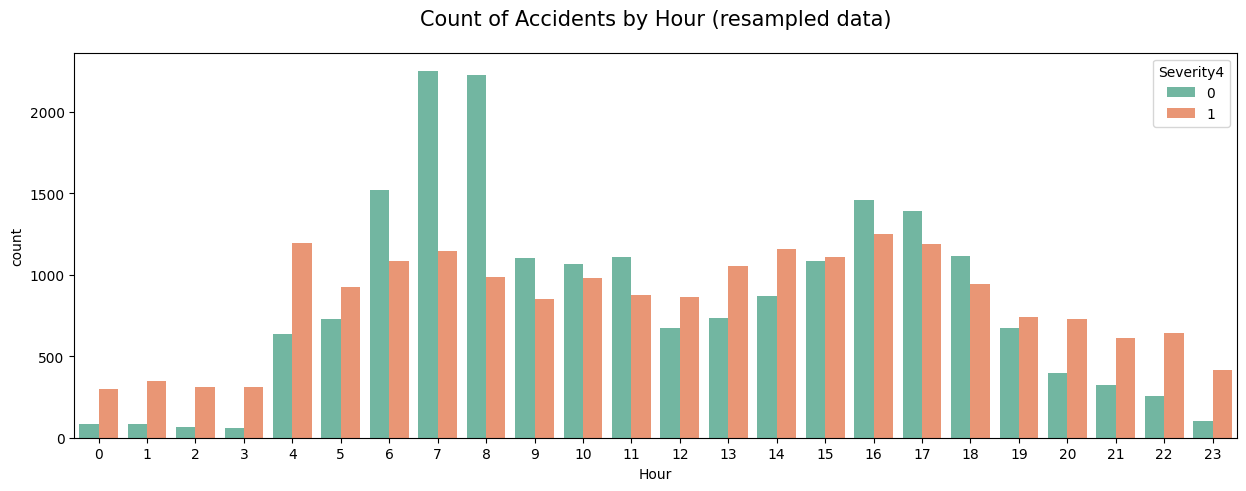

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Hour (resampled data)', size=15, y=1.05)
plt.show()

C:\Users\21069\AppData\Local\Temp\ipykernel_16484\2308557146.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Minute_Freq', y="Severity4", data=df_bl, palette="Set2")


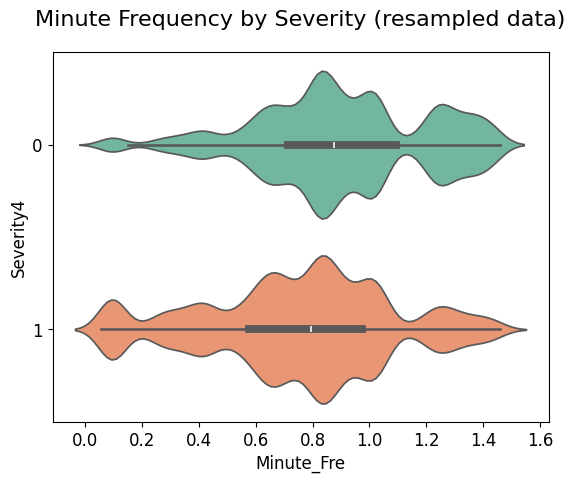

In [38]:
# frequence encoding and log-transform
df['Minute_Freq'] = df.groupby(['Minute'])['Minute'].transform('count')
df['Minute_Freq'] = df['Minute_Freq']/df.shape[0]*24*60
df['Minute_Freq'] = df['Minute_Freq'].apply(lambda x: np.log(x+1))

# resampling
df_bl = resample(df, 'Severity4', 20000)

# plot
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
sns.violinplot(x='Minute_Freq', y="Severity4", data=df_bl, palette="Set2")    
plt.xlabel('Minute_Fre', size=12, labelpad=3)
plt.ylabel('Severity4', size=12, labelpad=3)    
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Minute Frequency by Severity (resampled data)', size=16, y=1.05)
plt.show()

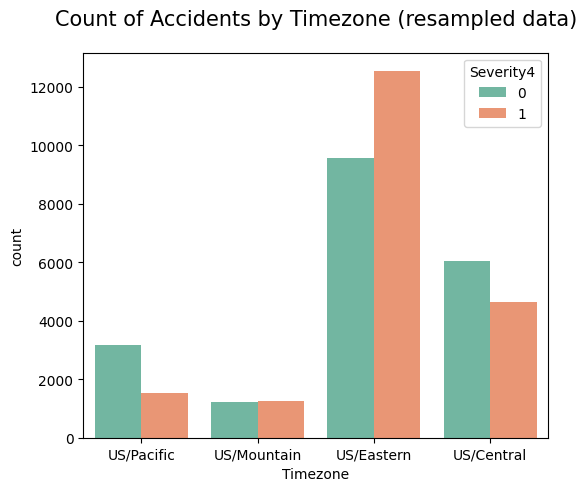

In [39]:
plt.figure(figsize=(6,5))
chart = sns.countplot(x='Timezone', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents by Timezone (resampled data)", size=15, y=1.05)
plt.show()

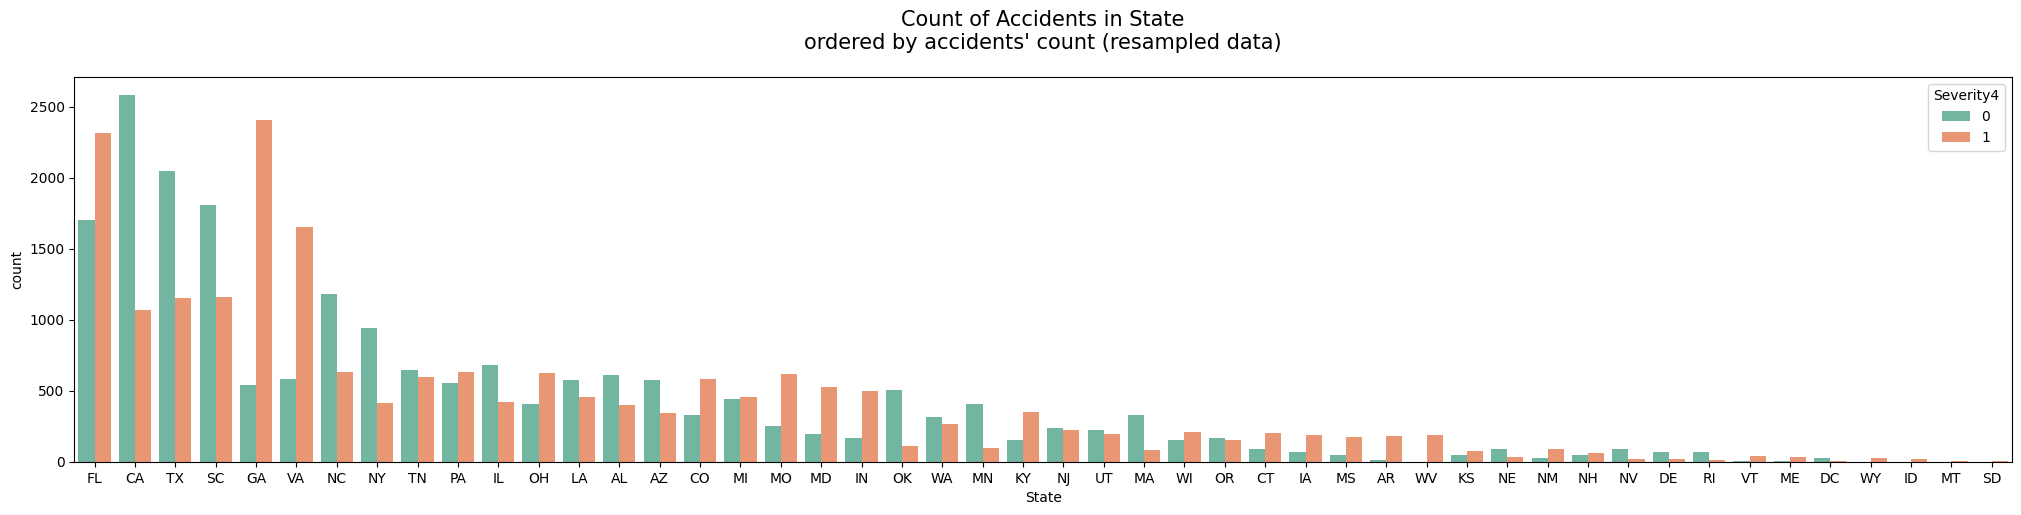

In [40]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', 
                      data=df_bl ,palette="Set2", order=df_bl['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by accidents' count (resampled data)", size=15, y=1.05)
plt.show()

In [41]:
# # !pip install -q censusdata
# import censusdata
# from census import Census
# from us import states

# # download data
# # Set API key
# c = Census("f094798fbfef4def69dd07a3ee1607f4ae8b24ea")
# va_census = c.acs5.state_county_tract(fields = ('NAME', 'C17002_001E', 'C17002_002E', 'C17002_003E', 'B01003_001E'),
#                                       state_fips = states.VA.fips,
#                                       county_fips = "*",
#                                       tract = "*",
#                                       year = 2017)
# # Create a dataframe from the census data
# va_df = pd.DataFrame(va_census)

# # rename columns
# county.columns = ['Population_County','Drive_County','Transit_County','Walk_County','MedianHouseholdIncome_County']
# county = county.reset_index()
# # extract county name and state name
# county['County_y'] = county['index'].apply(lambda x : x.name.split(' County')[0].split(',')[0]).str.lower()
# county['State_y'] = county['index'].apply(lambda x : x.name.split(':')[0].split(', ')[1])

In [42]:
# create a list of top 40 most common words in street name
st_type =' '.join(df['Street'].unique().tolist()) # flat the array of street name
st_type = re.split(" |-", st_type) # split the long string by space and hyphen
st_type = [x[0] for x in Counter(st_type).most_common(40)] # select the 40 most common words
print('the 40 most common words')
print(*st_type, sep = ", ") 

the 40 most common words
Rd, Dr, St, Ave, N, S, E, W, Ln, Blvd, Highway, Way, Ct, Pkwy, Hwy, SW, NE, Pl, NW, State, SE, Old, Road, Cir, US, Creek, County, Hill, Park, Route, Lake, Trl, I, Valley, Ridge, Mill, River, Oak, Pike, Loop


In [43]:
# Remove some irrelevant words and add spaces and hyphen back
st_type= [' Rd', ' St', ' Dr', ' Ave', ' Blvd', ' Ln', ' Highway', ' Pkwy', ' Hwy', 
          ' Way', ' Ct', 'Pl', ' Road', 'US-', 'Creek', ' Cir',  'Route', 
          'I-', 'Trl', 'Pike', ' Fwy']
print(*st_type, sep = ", ")  

 Rd,  St,  Dr,  Ave,  Blvd,  Ln,  Highway,  Pkwy,  Hwy,  Way,  Ct, Pl,  Road, US-, Creek,  Cir, Route, I-, Trl, Pike,  Fwy


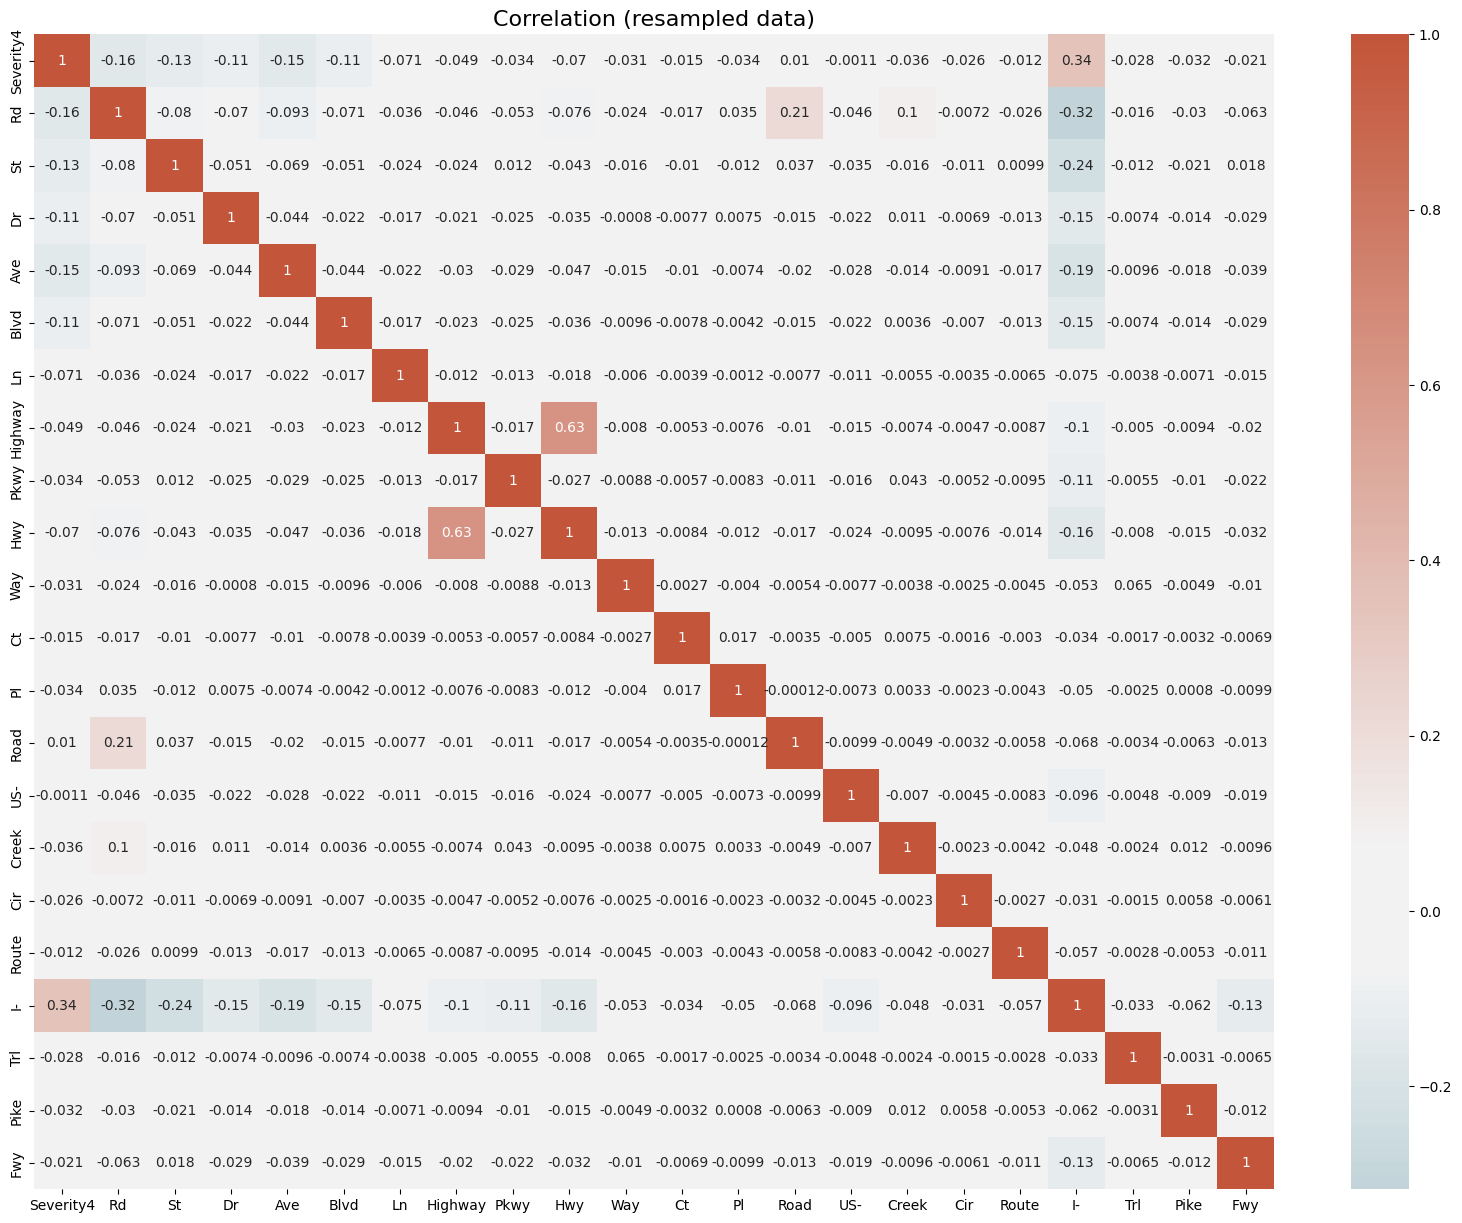

In [44]:
# for each word create a boolean column
for i in st_type:
  df[i.strip()] = np.where(df['Street'].str.contains(i, case=True, na = False), True, False)
df.loc[df['Road']==1,'Rd'] = True
df.loc[df['Highway']==1,'Hwy'] = True

# resample again
df_bl = resample(df, 'Severity4', 20000)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
street_corr  = df_bl.loc[:,['Severity4']+[x.strip() for x in st_type]].corr()
plt.figure(figsize=(20,15))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(street_corr, annot=True, cmap=cmap, center=0).set_title("Correlation (resampled data)", fontsize=16)
plt.show()

In [45]:
drop_list = street_corr.index[street_corr['Severity4'].abs()<0.1].to_list()
df = df.drop(drop_list, axis=1)

# resample again
df_bl = resample(df, 'Severity4', 20000)

C:\Users\21069\AppData\Local\Temp\ipykernel_16484\3739133823.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
C:\Users\21069\AppData\Local\Temp\ipykernel_16484\3739133823.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")


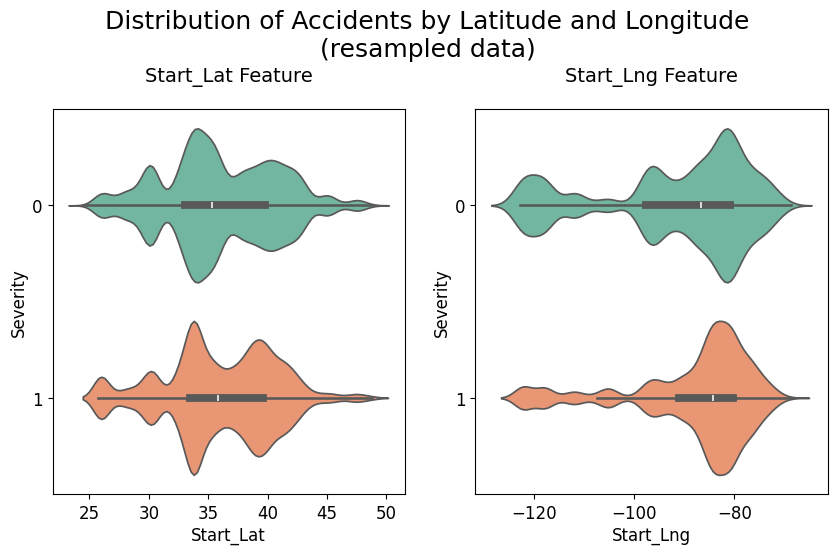

In [46]:
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
num_features = ['Start_Lat', 'Start_Lng']
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(1, 2, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Distribution of Accidents by Latitude and Longitude\n(resampled data)', fontsize=18,y=1.08)
plt.show()

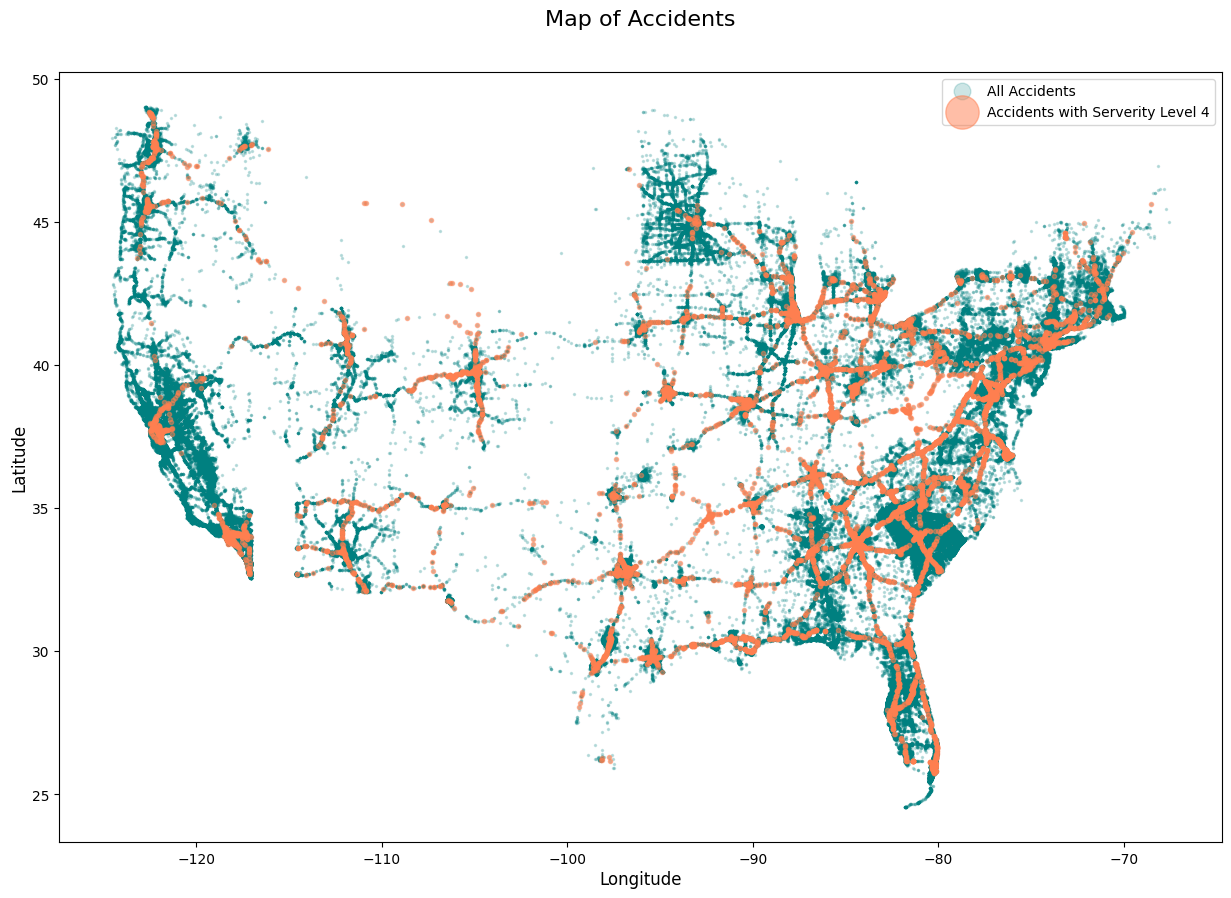

In [47]:
df_4 = df[df['Severity4']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

In [48]:
fre_list = ['Street', 'City', 'County', 'Zipcode', 'Airport_Code','State']
for i in fre_list:
  newname = i + '_Freq'
  df[newname] = df.groupby([i])[i].transform('count')
  df[newname] = df[newname]/df.shape[0]*df[i].unique().size
  df[newname] = df[newname].apply(lambda x: np.log(x+1))

C:\Users\21069\AppData\Local\Temp\ipykernel_16484\14919337.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
C:\Users\21069\AppData\Local\Temp\ipykernel_16484\14919337.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
C:\Users\21069\AppData\Local\Temp\ipykernel_16484\14919337.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
C:\Users\21069\AppData\Local\Temp\ipyker

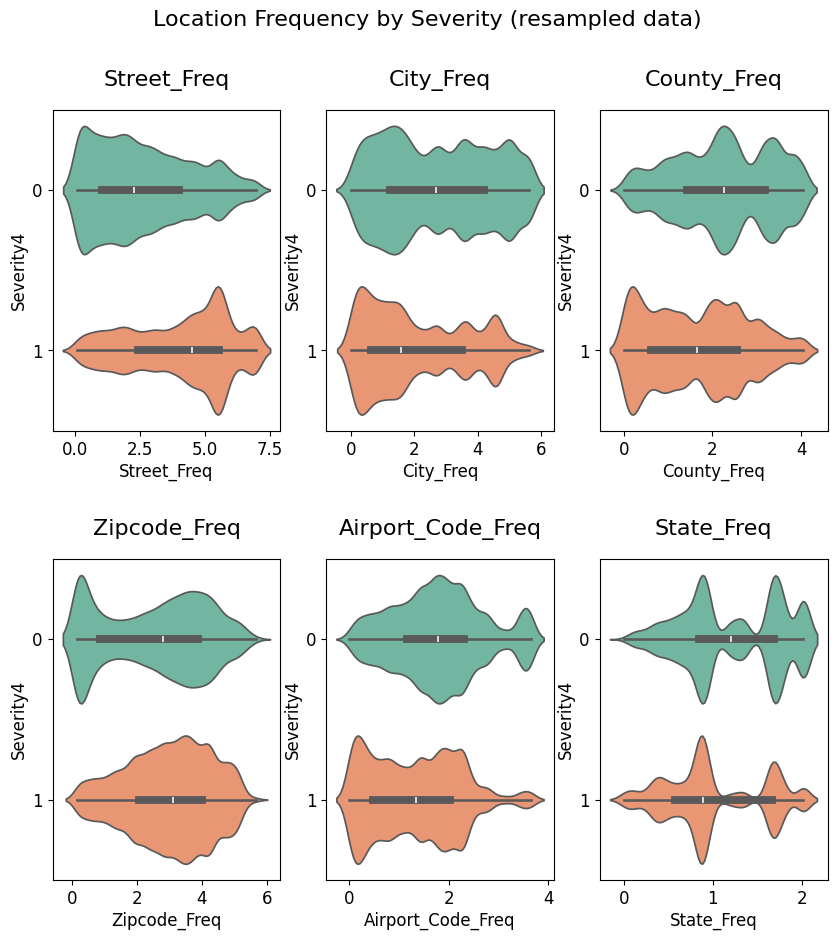

In [49]:
# resample again
df_bl = resample(df, 'Severity4', 20000)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
fig.suptitle('Location Frequency by Severity (resampled data)', fontsize=16)
for i, feature in enumerate(fre_list, 1): 
    feature = feature + '_Freq'   
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity4', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{}'.format(feature), size=16, y=1.05)
plt.show()

In [50]:
display(df_bl["County"])

1122748         Oconee
1034203      Allegheny
2031729           King
1424626      Jefferson
1287647       Buncombe
              ...     
2144087    Mecklenburg
1941514       Richmond
2215935    Westchester
1680489         Monroe
1595797     Miami-Dade
Name: County, Length: 40000, dtype: object

In [51]:
df = df.drop(fre_list, axis  = 1)

In [52]:
new_list = [feature + '_Freq' for feature in fre_list]
display(df.loc[:,new_list])

,Street_Freq,City_Freq,County_Freq,Zipcode_Freq,Airport_Code_Freq,State_Freq
1000220,4.072392,0.714239,0.303402,2.897930,0.360241,0.953034
1000221,4.014459,0.214119,0.303402,0.401674,0.099179,0.953034
1000222,3.212957,0.288391,0.303402,1.600315,0.360241,0.953034
1000302,3.956051,1.708509,3.022064,3.626471,2.782477,0.953034
1000303,3.016536,4.224979,3.022064,4.270027,2.782477,0.953034
...,...,...,...,...,...,...
2239286,6.375844,4.766676,4.047792,3.581634,2.850174,2.017694
2239287,1.893231,0.126900,4.047792,0.600962,0.867568,2.017694
2239288,3.676770,1.551144,4.047792,3.373362,0.867568,2.017694
2239289,2.247197,0.611750,4.047792,2.879592,1.840439,2.017694


In [53]:
df['Pressure_bc']= boxcox(df['Pressure(in)'].apply(lambda x: x+1),lmbda=6)
df['Visibility_bc']= boxcox(df['Visibility(mi)'].apply(lambda x: x+1),lmbda = 0.1)
df['Wind_Speed_bc']= boxcox(df['Wind_Speed(mph)'].apply(lambda x: x+1),lmbda=-0.2)
df = df.drop(['Pressure(in)','Visibility(mi)','Wind_Speed(mph)'], axis=1)

C:\Users\21069\AppData\Local\Temp\ipykernel_16484\3471405941.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
C:\Users\21069\AppData\Local\Temp\ipykernel_16484\3471405941.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
C:\Users\21069\AppData\Local\Temp\ipykernel_16484\3471405941.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
C:\Users\21069\AppData\Local\Temp\

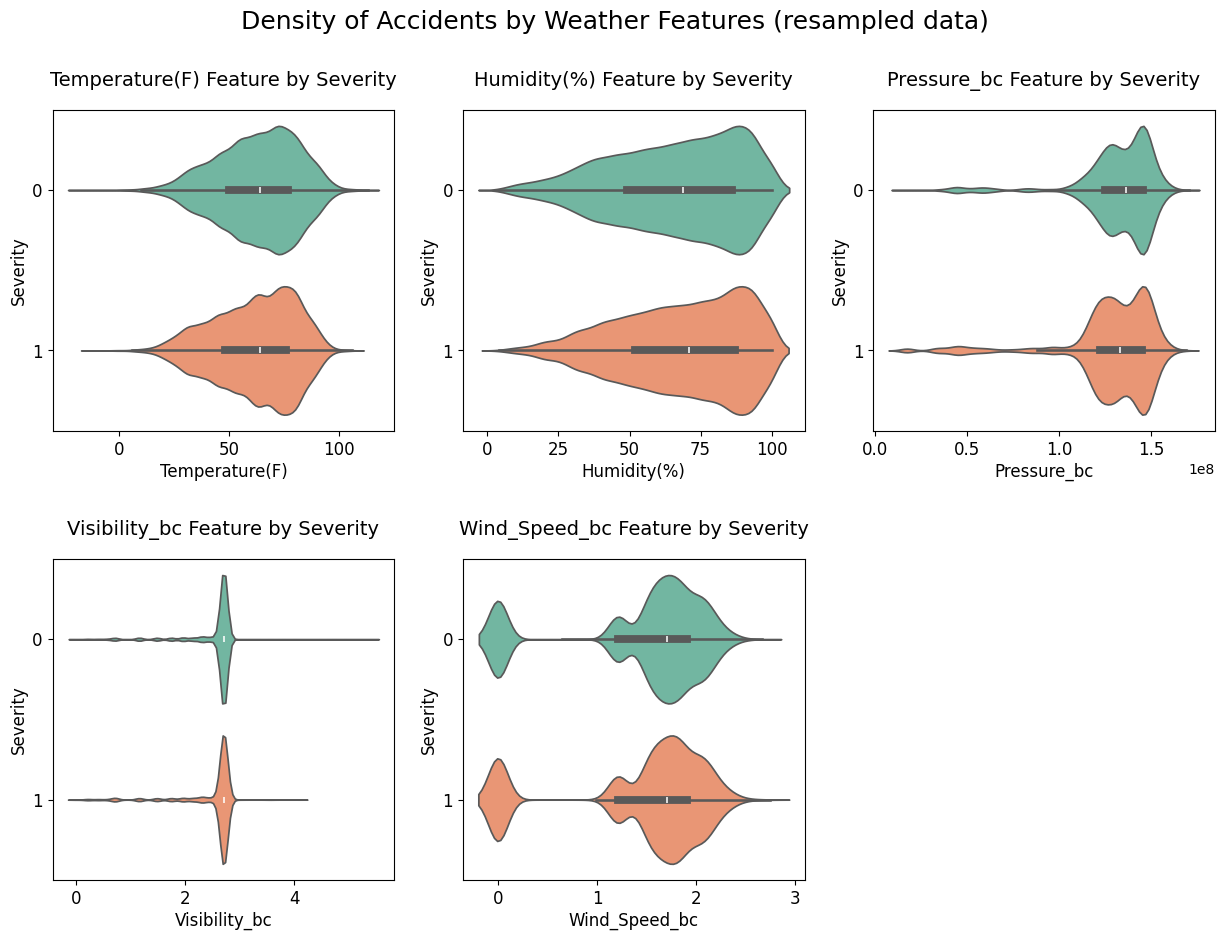

In [54]:
# resample again
df_bl = resample(df, 'Severity4', 20000)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
num_features = ['Temperature(F)', 'Humidity(%)', 'Pressure_bc', 'Visibility_bc', 'Wind_Speed_bc']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature by Severity'.format(feature), size=14, y=1.05)
fig.suptitle('Density of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

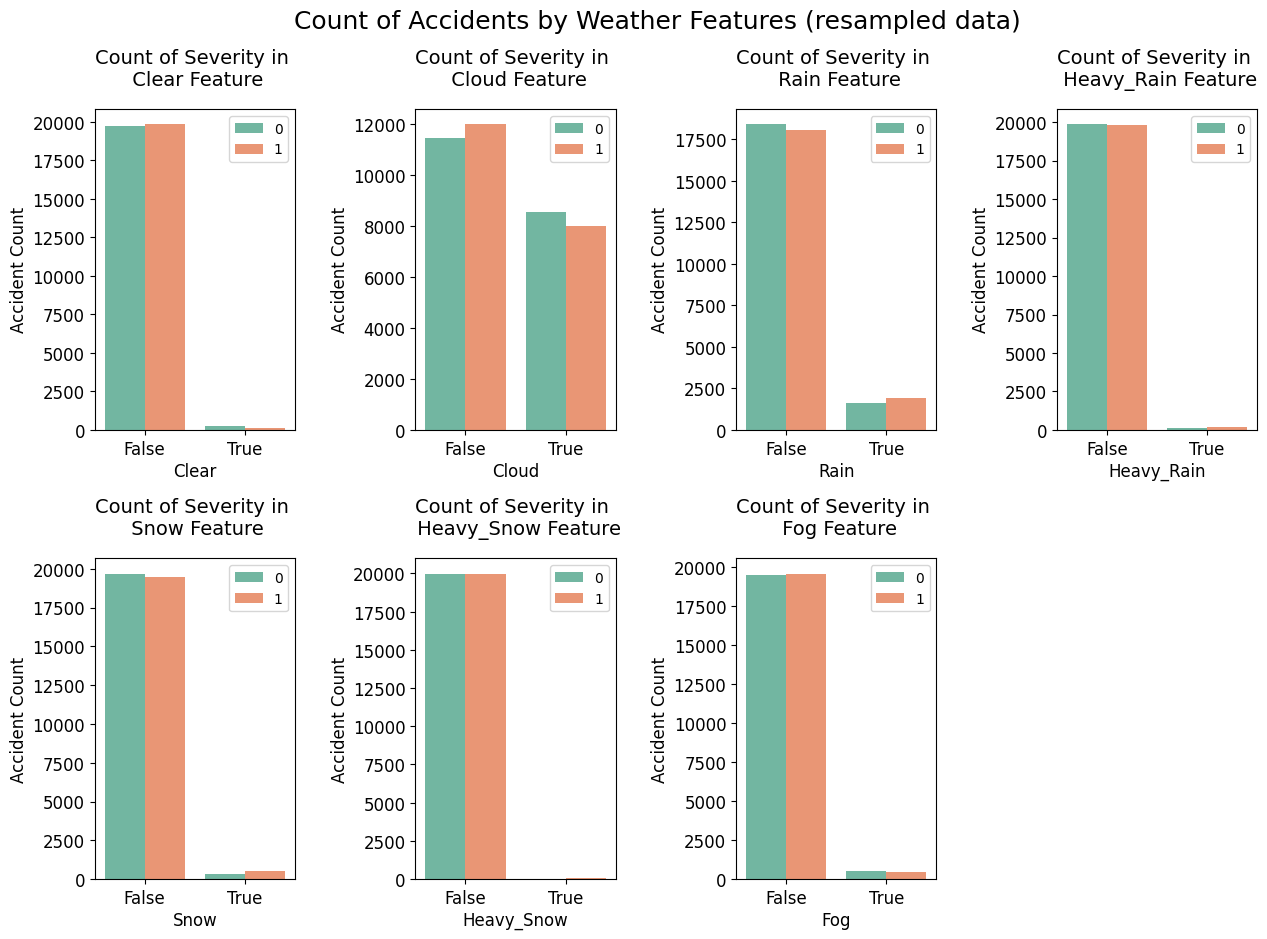

In [55]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.6)
for i, feature in enumerate(weather, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in \n {} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

In [56]:
df = df.drop(['Heavy_Rain','Heavy_Snow','Fog'], axis  = 1)

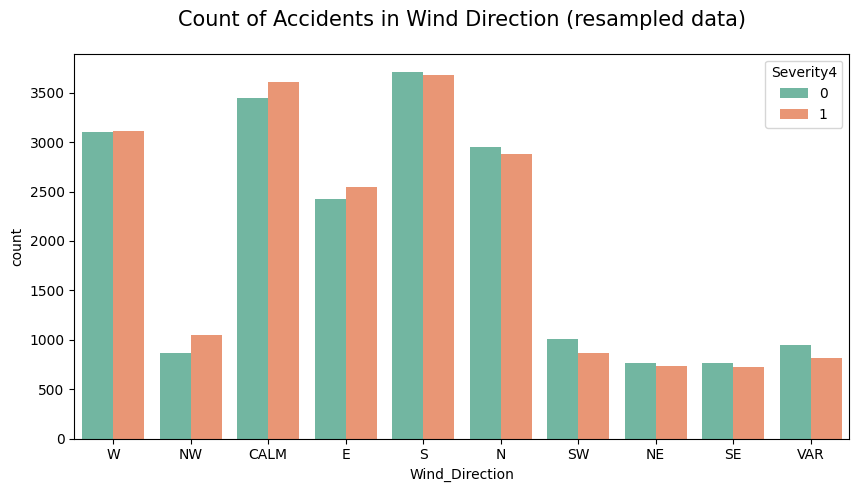

In [57]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Wind_Direction', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents in Wind Direction (resampled data)", size=15, y=1.05)
plt.show()

In [58]:
df = df.drop(['Wind_Direction'], axis=1)

In [59]:
df.columns

Index(['Start_Lat', 'Start_Lng', 'Timezone', 'Temperature(F)', 'Humidity(%)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Clear', 'Cloud', 'Rain',
       'Snow', 'Month', 'Weekday', 'Day', 'Hour', 'Minute', 'Precipitation_NA',
       'Severity4', 'Minute_Freq', 'Rd', 'St', 'Dr', 'Ave', 'Blvd', 'I-',
       'Street_Freq', 'City_Freq', 'County_Freq', 'Zipcode_Freq',
       'Airport_Code_Freq', 'State_Freq', 'Pressure_bc', 'Visibility_bc',
       'Wind_Speed_bc'],
      dtype='object')

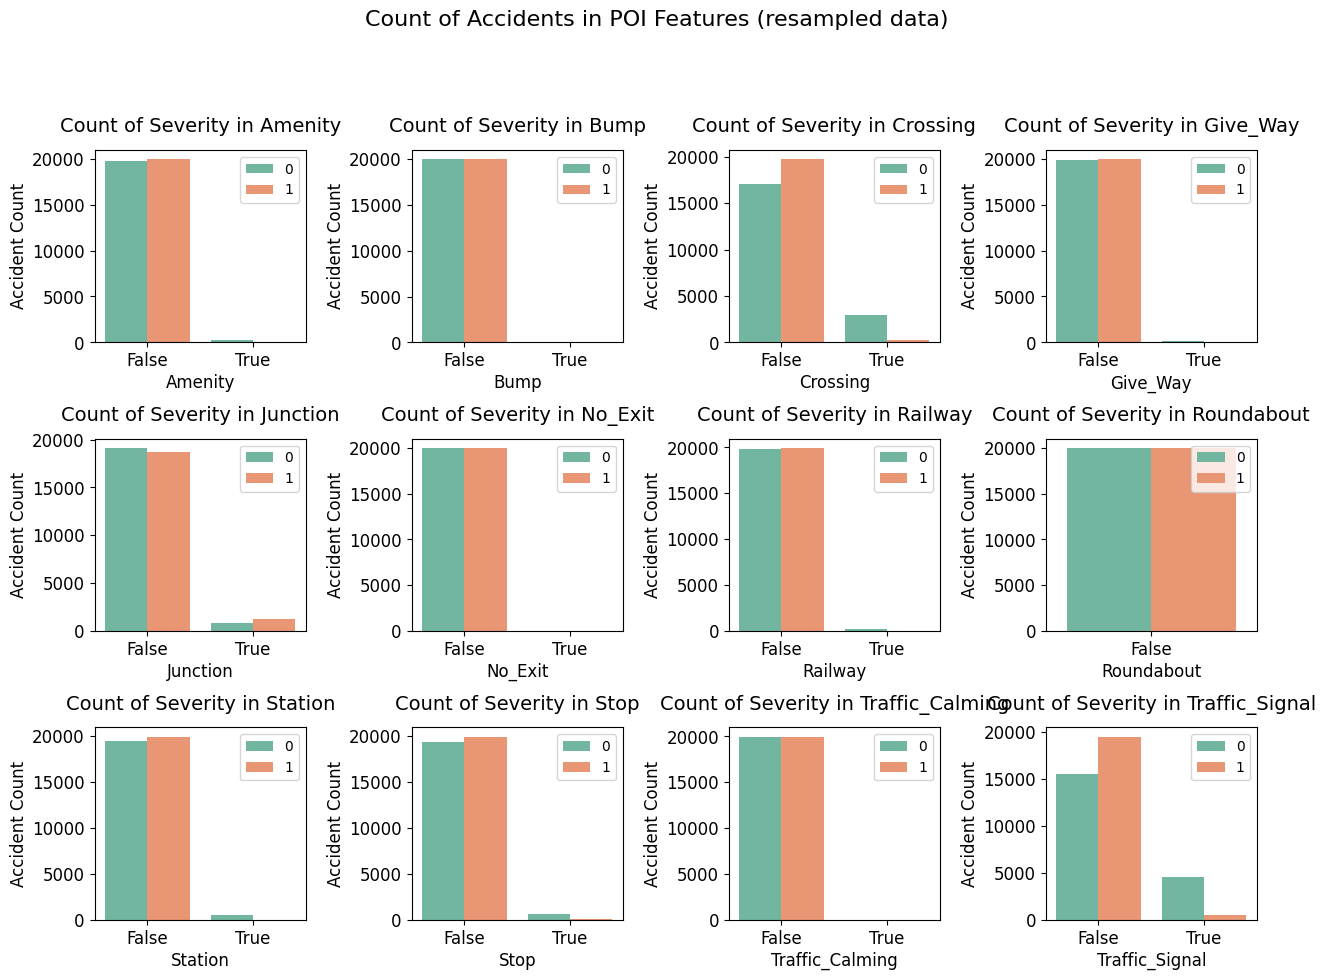

In [60]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI Features (resampled data)',y=1.02, fontsize=16)
plt.show()

In [61]:
df= df.drop(['Amenity','Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming'], axis=1)

In [62]:
# one-hot encoding
df[period_features] = df[period_features].astype('category')
df = pd.get_dummies(df, columns=period_features, drop_first=True)

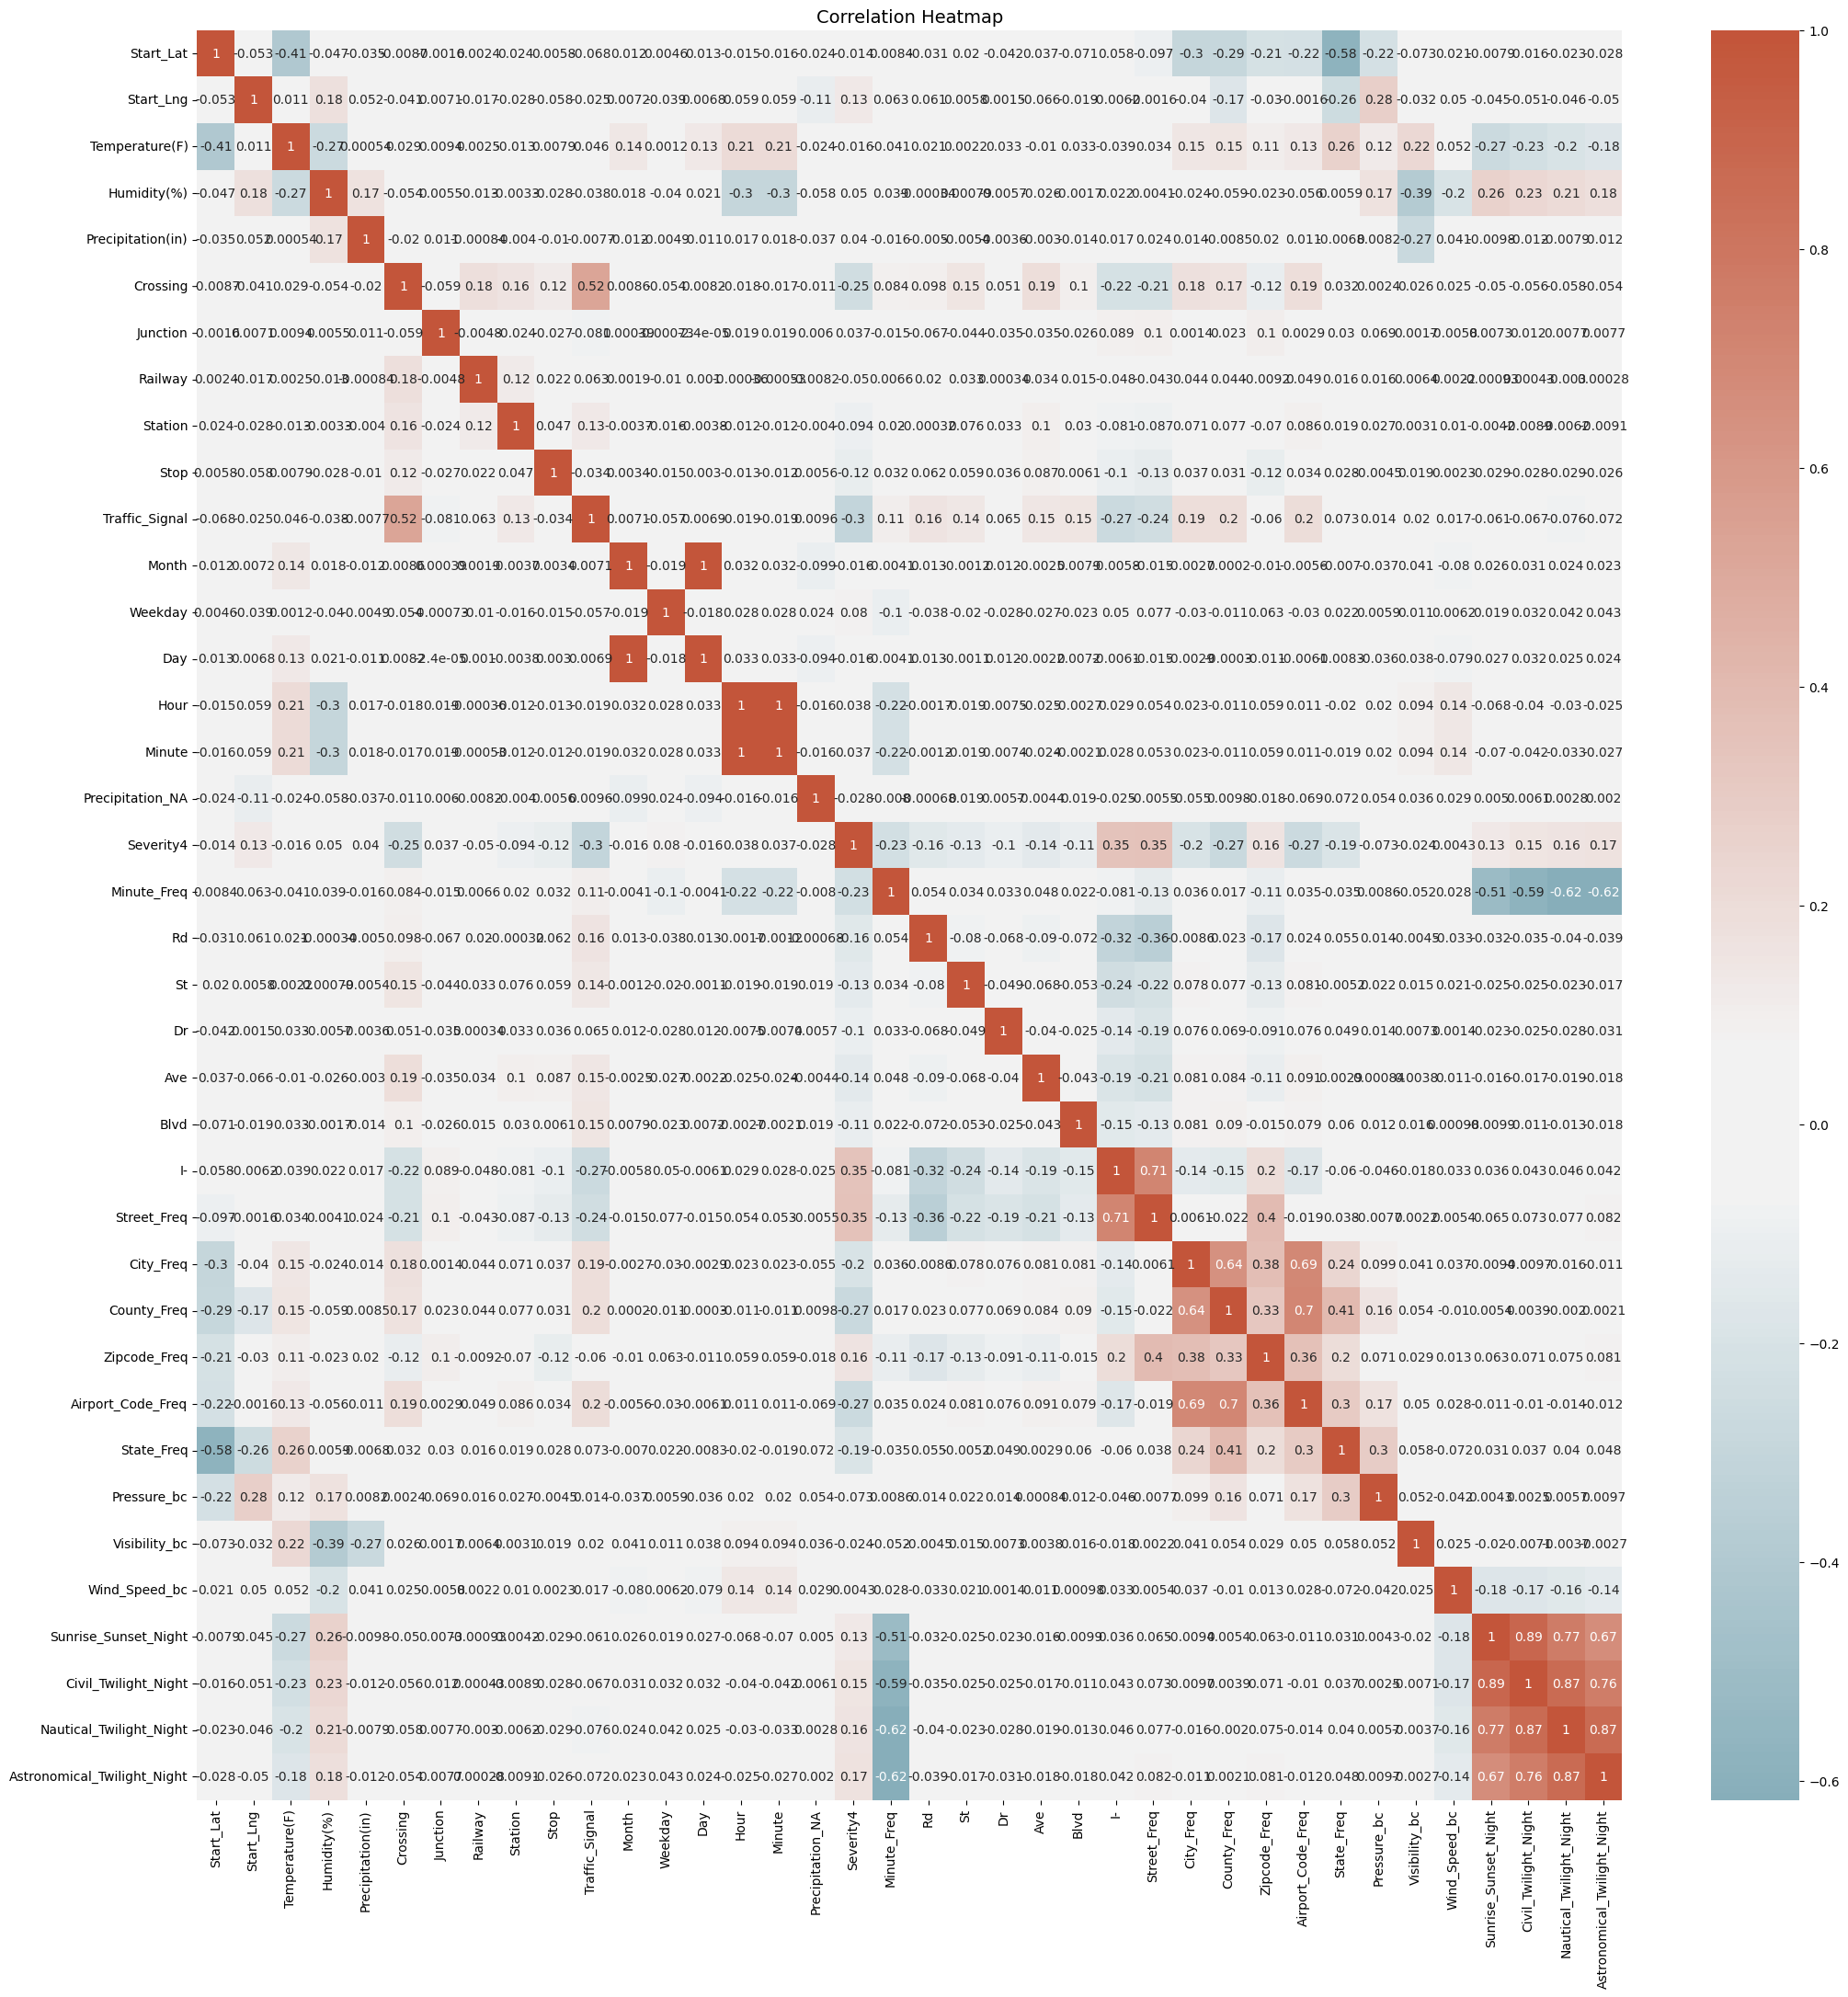

In [63]:
# resample again
df_bl = resample(df, 'Severity4', 20000)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

In [64]:
df = df.drop(['Temperature(F)', 'Humidity(%)', 'Precipitation(in)', 'Precipitation_NA','Visibility_bc', 'Wind_Speed_bc',
              'Clear','Cloud','Snow','Crossing','Junction','Railway','Month',
              'Hour', 'Day','Minute',
              'City_Freq','County_Freq','Airport_Code_Freq','Zipcode_Freq',
              'Sunrise_Sunset_Night', 'Civil_Twilight_Night', 'Nautical_Twilight_Night'], axis=1)

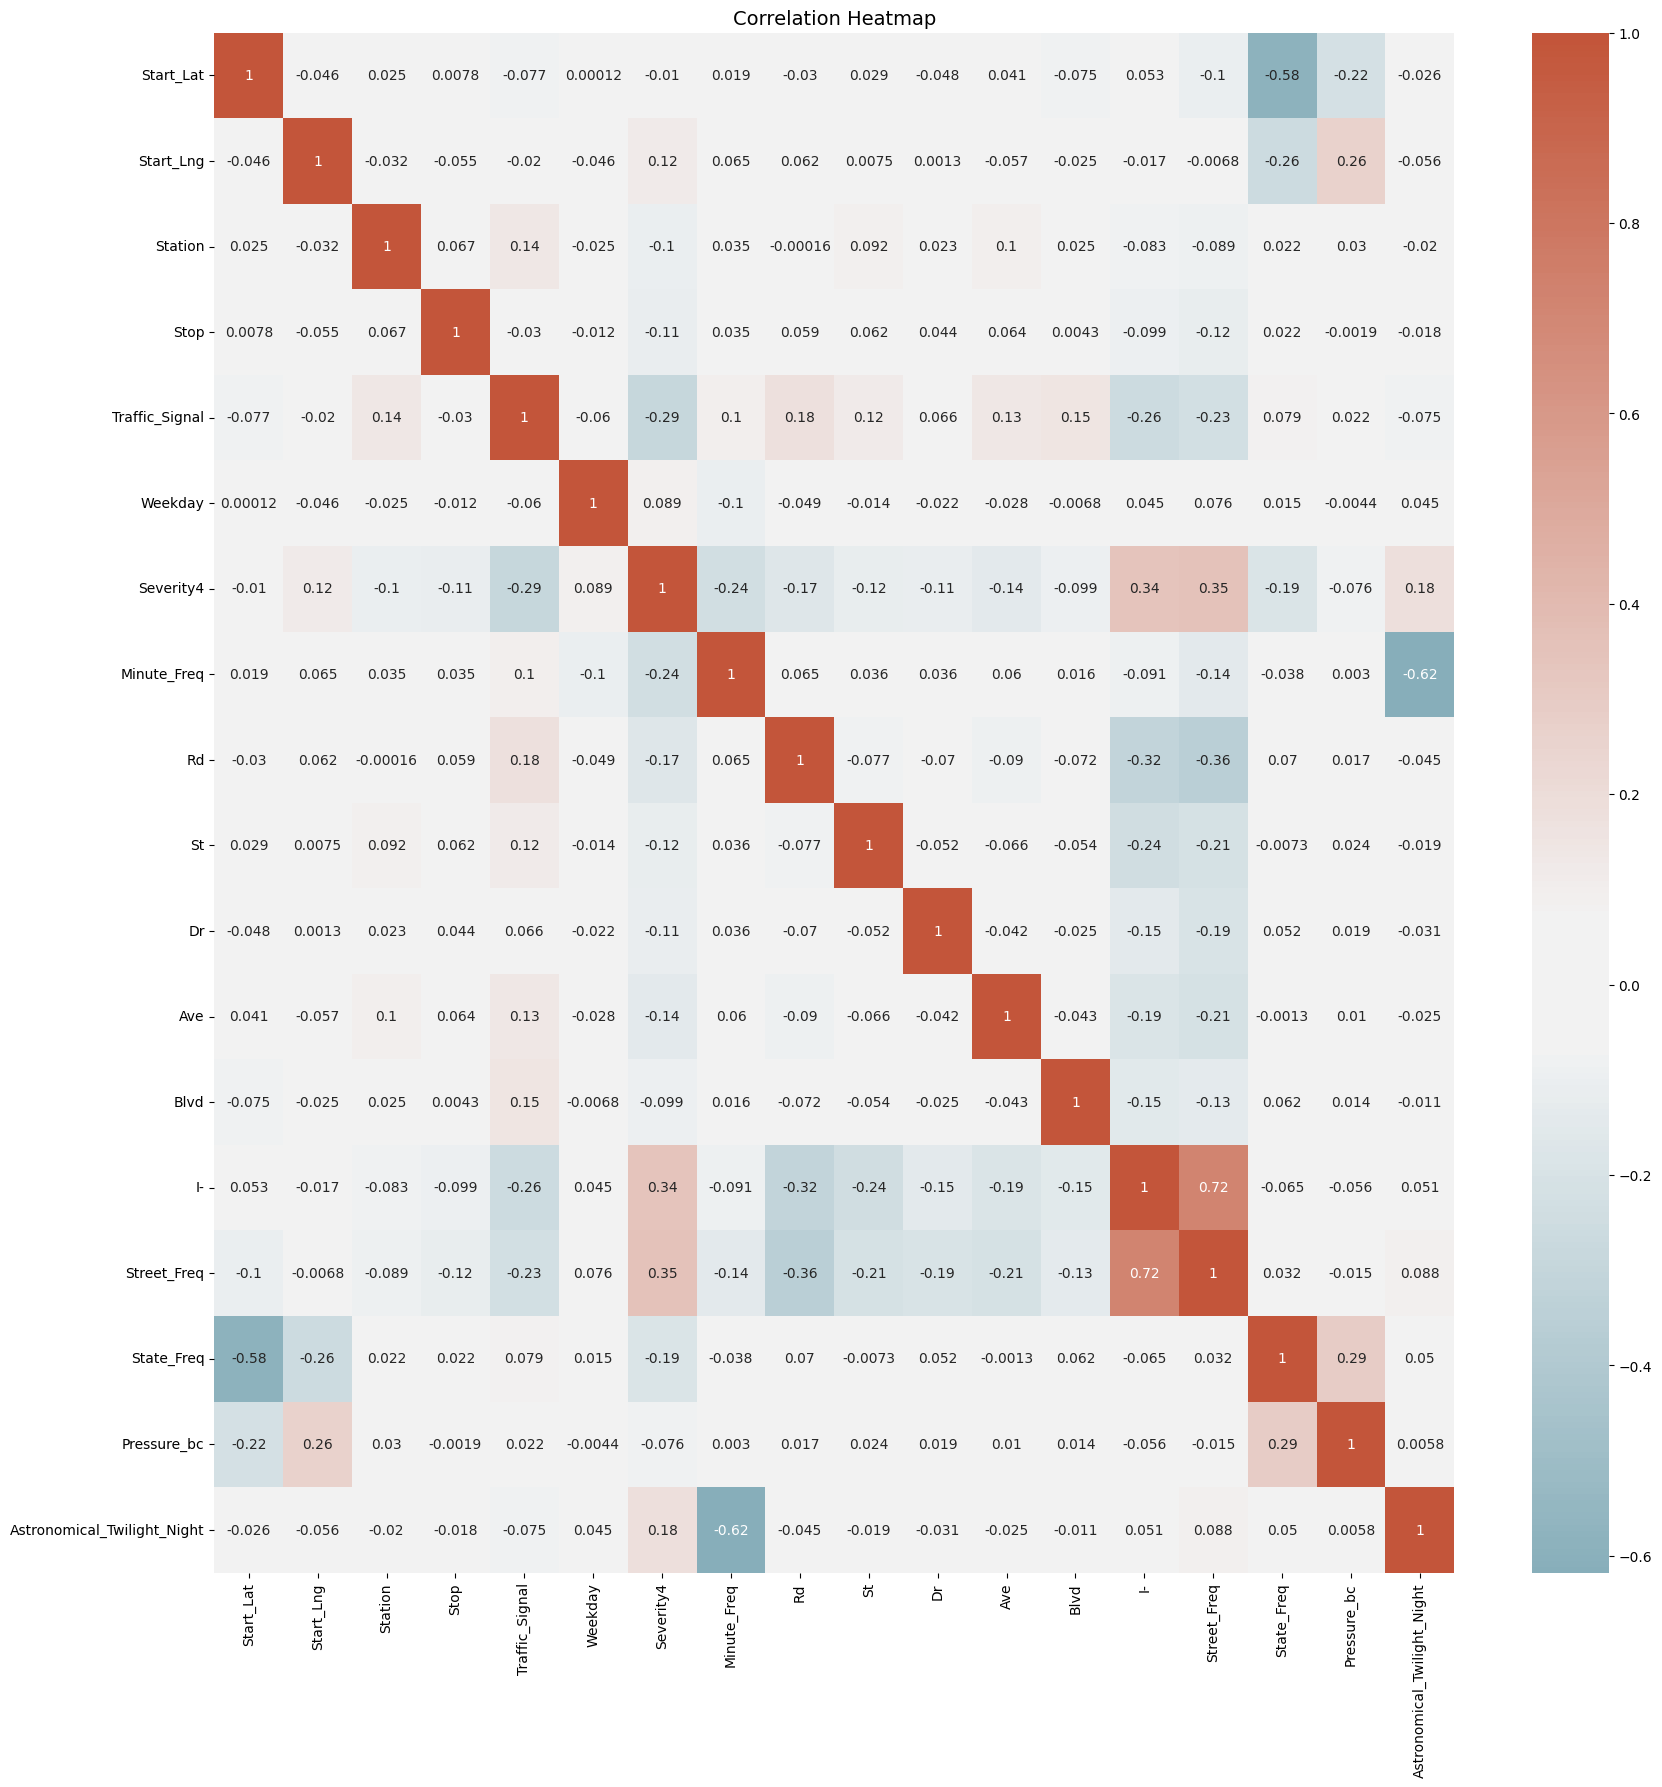

In [65]:
# resample again
df_bl = resample(df, 'Severity4', 20000)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

In [66]:
df.columns
df.info

<bound method DataFrame.info of          Start_Lat   Start_Lng    Timezone  Station   Stop  Traffic_Signal  \
1000220  40.048031  -88.303787  US/Central    False  False           False   
1000221  40.385616  -88.135925  US/Central    False  False           False   
1000222  40.129436  -88.184937  US/Central    False  False           False   
1000302  41.872459  -87.817444  US/Central    False  False           False   
1000303  41.876186  -87.660774  US/Central    False  False           False   
...            ...         ...         ...      ...    ...             ...   
2239286  34.029114 -118.225960  US/Pacific    False  False           False   
2239287  34.506458 -117.913994  US/Pacific    False  False           False   
2239288  34.557842 -118.132324  US/Pacific    False  False           False   
2239289  33.876514 -118.082283  US/Pacific    False  False           False   
2239290  34.024231 -118.242386  US/Pacific    False  False           False   

          Rain  Weekday  Severi

In [67]:
# df = df.replace([True, False], [1,0])

# cat = ['Timezone','Weekday']
# df[cat] = df[cat].astype('category')
# df = pd.get_dummies(df, columns=cat, drop_first=True)

# df_int = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
# df_float = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')

# df = pd.concat([df.select_dtypes(include=['uint8']),df_int,df_float],axis=1)
# df.info()

In [68]:
df = df.replace([True, False], [1,0])

cat = ['Timezone','Weekday']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166727 entries, 1000220 to 2239290
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Start_Lat                    1166727 non-null  float64
 1   Start_Lng                    1166727 non-null  float64
 2   Station                      1166727 non-null  int64  
 3   Stop                         1166727 non-null  int64  
 4   Traffic_Signal               1166727 non-null  int64  
 5   Rain                         1166727 non-null  int64  
 6   Severity4                    1166727 non-null  int64  
 7   Minute_Freq                  1166727 non-null  float64
 8   Rd                           1166727 non-null  int64  
 9   St                           1166727 non-null  int64  
 10  Dr                           1166727 non-null  int64  
 11  Ave                          1166727 non-null  int64  
 12  Blvd                         1166727

In [69]:
df_int = df.select_dtypes(include=['int64']).apply(pd.to_numeric,downcast='unsigned')
df_float = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')

In [70]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166727 entries, 1000220 to 2239290
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   Station         1166727 non-null  uint8
 1   Stop            1166727 non-null  uint8
 2   Traffic_Signal  1166727 non-null  uint8
 3   Rain            1166727 non-null  uint8
 4   Severity4       1166727 non-null  uint8
 5   Rd              1166727 non-null  uint8
 6   St              1166727 non-null  uint8
 7   Dr              1166727 non-null  uint8
 8   Ave             1166727 non-null  uint8
 9   Blvd            1166727 non-null  uint8
 10  I-              1166727 non-null  uint8
dtypes: uint8(11)
memory usage: 21.1 MB


In [71]:
df_float.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166727 entries, 1000220 to 2239290
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Start_Lat    1166727 non-null  float32
 1   Start_Lng    1166727 non-null  float32
 2   Minute_Freq  1166727 non-null  float32
 3   Street_Freq  1166727 non-null  float32
 4   State_Freq   1166727 non-null  float32
 5   Pressure_bc  1166727 non-null  float32
dtypes: float32(6)
memory usage: 35.6 MB


In [72]:
df_test = pd.concat([df.select_dtypes(include=['uint8']),df_int,df_float],axis=1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166727 entries, 1000220 to 2239290
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Astronomical_Twilight_Night  1166727 non-null  uint8  
 1   Timezone_US/Eastern          1166727 non-null  uint8  
 2   Timezone_US/Mountain         1166727 non-null  uint8  
 3   Timezone_US/Pacific          1166727 non-null  uint8  
 4   Weekday_1                    1166727 non-null  uint8  
 5   Weekday_2                    1166727 non-null  uint8  
 6   Weekday_3                    1166727 non-null  uint8  
 7   Weekday_4                    1166727 non-null  uint8  
 8   Weekday_5                    1166727 non-null  uint8  
 9   Weekday_6                    1166727 non-null  uint8  
 10  Station                      1166727 non-null  uint8  
 11  Stop                         1166727 non-null  uint8  
 12  Traffic_Signal               1166727

In [73]:
df = pd.concat([df.select_dtypes(include=['uint8']),df_int,df_float],axis=1)

In [74]:
from sklearn.model_selection import train_test_split
# split X, y
X = df.drop('Severity4', axis=1)
y= df['Severity4']

# split train, test
X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.30, random_state=42)

In [75]:
from imblearn.under_sampling import RandomUnderSampler
# Randomly undersample majority class to about 10 times of minority class
rus = RandomUnderSampler(sampling_strategy = 1, random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({0: 809651, 1: 7057})
Distribution of class labels after resampling Counter({0: 7057, 1: 7057})


In [76]:
# Combine X_train_res and y_train_res into a single DataFrame
train_resampled = pd.concat([y_train_res, X_train_res], axis=1)

# Combine X_test and y_test into a single DataFrame
test_set = pd.concat([y_test, X_test], axis=1)

# Add an index column
train_resampled.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)

# Save the resampled training set to a CSV file with 'Index' as the first column
train_resampled.index.name = 'Index'
train_resampled.to_csv('train_resampled_balanced.csv')

# Save the test set to a CSV file with 'Index' as the first column
test_set.index.name = 'Index'
test_set.to_csv('test_set_balanced.csv')

# Display the head of the saved files
print(train_resampled.head())
print(test_set.head())

       Severity4  Astronomical_Twilight_Night  Timezone_US/Eastern  \
Index                                                                
0              0                            0                    1   
1              0                            0                    1   
2              0                            0                    1   
3              0                            0                    0   
4              0                            0                    1   

       Timezone_US/Mountain  Timezone_US/Pacific  Weekday_1  Weekday_2  \
Index                                                                    
0                         0                    0          0          1   
1                         0                    0          0          0   
2                         0                    0          0          0   
3                         1                    0          0          1   
4                         0                    0          0      

In [77]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [78]:
# clf_base = RandomForestClassifier()
# grid = {'n_estimators': [10, 50, 100],
#         'max_features': ['auto','sqrt']}
# clf_rf = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

# clf_rf.fit(X_train_res, y_train_res)
# y_pred = clf_rf.predict(X_test)

# print (classification_report(y_test, y_pred))

In [79]:
# confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

# conf_matrix = pd.DataFrame(data=confmat,
#                            columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# plt.figure(figsize = (8,5))
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
#     "Confusion Matrix \n Random Forest", fontsize=16)
# plt.show()

In [80]:
# # Randomly undersample majority class to about 20 times of minority class
# rus = RandomUnderSampler(sampling_strategy = 0.05, random_state=42)
# X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
# print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
# print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

In [81]:
# clf_base = RandomForestClassifier()
# grid = {'n_estimators': [10, 50, 100, 200],
#         'max_features': ['auto','sqrt', 'log2']}
# clf_rf = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

# clf_rf.fit(X_train_res, y_train_res)
# y_pred = clf_rf.predict(X_test)

# print (classification_report(y_test, y_pred))